Spencer Halverson

MATH 437

11/18/2021

In [3]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint

# Problem 1

Complete the following function, by implementing the anisotropic diffusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diffused image for σ = .1,
λ = .25, N = 5, 20, 100.

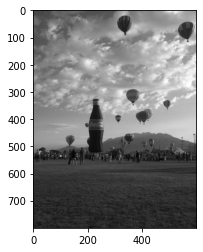

In [6]:
picture = imread('balloon.jpg', as_gray=True) * 1./255

plt.imshow(picture, cmap=cm.gray)
plt.show()

In [7]:
def anisdiff_bw(U, N, lam, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """

    # get shape of U (push and pull like a magnet do)
    m,n = U.shape
    
    # get initial U0
    u = []
    u0 = U.copy()
    u.append(u0)

    # compute approximations
    for i in range(N):
        X = u[-1].copy()
        Y = np.zeros((m+2, n+2))

        # set interior
        Y[1:-1, 1:-1] = X[:, :]
        # set edge values
        Y[0, 1:-1] = X[0, :] # top
        Y[-1, 1:-1] = X[-1, :] # bottom
        Y[1:-1, 0] = X[:, 0] # left
        Y[1:-1, -1] = X[:, -1] # right

        # next approximation
        next_U = X[:, :].copy()
        next_U += lam*(g(np.abs(Y[:-2, 1:-1] - X))*(Y[:-2, 1:-1] - X))
        next_U += lam*(g(np.abs(Y[2:, 1:-1] - X))*(Y[2:, 1:-1] - X))
        next_U += lam*(g(np.abs(Y[1:-1, :-2] - X))*(Y[1:-1, :-2] - X))
        next_U += lam*(g(np.abs(Y[1:-1, 2:] - X))*(Y[1:-1, 2:] - X))

        u.append(next_U)
    
    return u




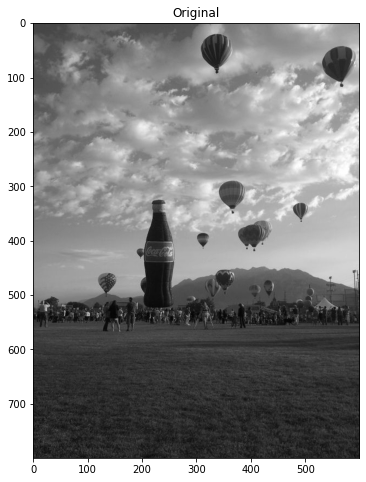

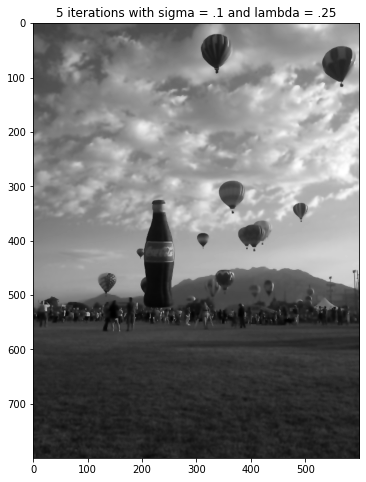

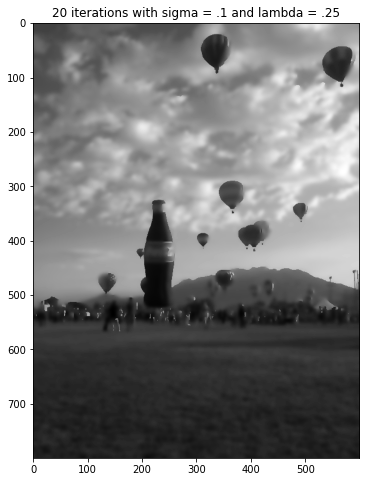

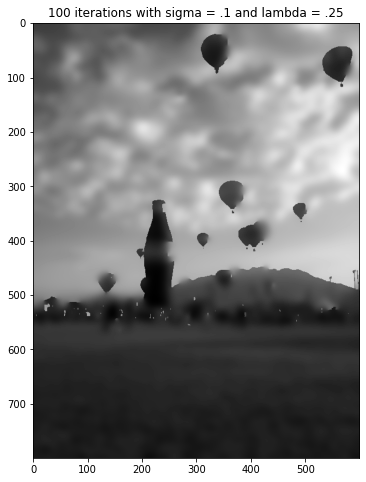

In [15]:
picture = imread('balloon.jpg', as_gray=True) * 1./255

fig = plt.figure(figsize=(8,8))
plt.title("Original")
plt.imshow(picture, cmap=cm.gray)
plt.show()

# set constants
sigma = 0.1
lam = 0.25


g = np.vectorize(lambda x: np.exp(-1*((x/sigma)**2)))

for N in [5, 20, 100]:
    fig = plt.figure(figsize=(8,8))
    plt.title("{} iterations with sigma = .1 and lambda = .25".format(N))
    blur_pic = anisdiff_bw(picture, N, lam, g)[-1]
    plt.imshow(blur_pic, cmap=cm.gray)
    plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [17]:
def anisdiff_color(U, N, lam, sigma):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    norm = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    g = np.vectorize(lambda x: np.exp(-1*((x/sigma)**2)))

    # get shape of U (push and pull like a magnet do)
    m,n,l = U.shape
    
    # get initial U0
    u = []
    u0 = U.copy()
    u.append(u0)

    # compute approximations
    for i in range(N):
        X = u[-1].copy()
        Y = np.zeros((m+2, n+2, l))

        # set interior
        Y[1:-1, 1:-1, :] = X[:, :, :]
        # set edge values
        Y[0, 1:-1, :] = X[0, :, :] # top
        Y[-1, 1:-1, :] = X[-1, :, :] # bottom
        Y[1:-1, 0, :] = X[:, 0, :] # left
        Y[1:-1, -1, :] = X[:, -1, :] # right

        # next approximation
        next_U = X[:, :, :].copy()
        next_U += lam*(g(norm(Y[:-2, 1:-1, :] - X))*(Y[:-2, 1:-1, :] - X))
        next_U += lam*(g(norm(Y[2:, 1:-1, :] - X))*(Y[2:, 1:-1, :] - X))
        next_U += lam*(g(norm(Y[1:-1, :-2, :] - X))*(Y[1:-1, :-2, :] - X))
        next_U += lam*(g(norm(Y[1:-1, 2:, :] - X))*(Y[1:-1, 2:, :] - X))

        u.append(next_U)
    
    return u




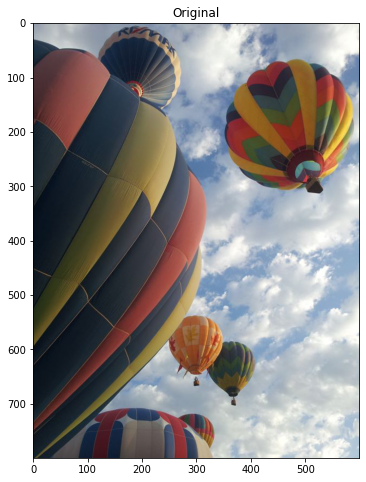

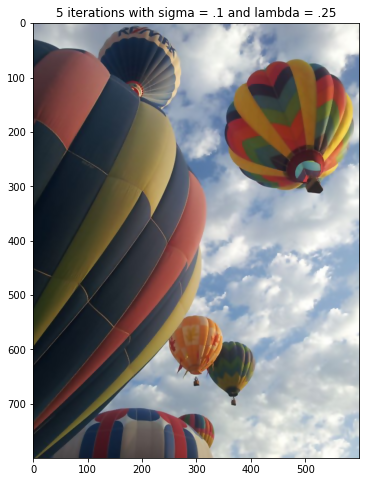

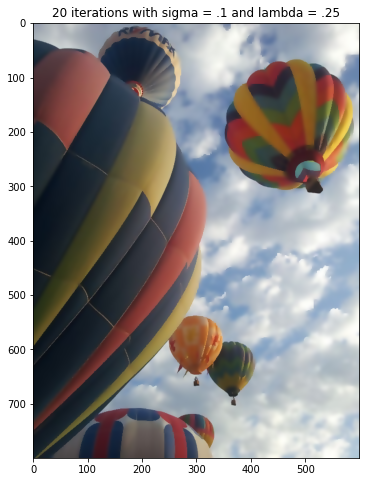

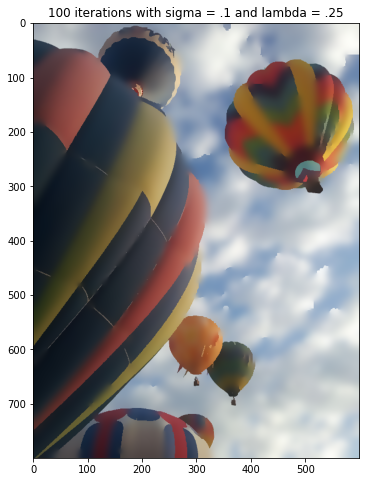

In [19]:
picture = imread('balloons_color.jpg') * 1./255

fig = plt.figure(figsize=(8,8))
plt.title("Original")
plt.imshow(picture)
plt.show()

# set constants
sigma = 0.1
lam = 0.25


for N in [5, 20, 100]:
    fig = plt.figure(figsize=(8,8))
    plt.title("{} iterations with sigma = .1 and lambda = .25".format(N))
    blur_pic = anisdiff_color(picture, N, lam, sigma)[-1]
    plt.imshow(blur_pic)
    plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

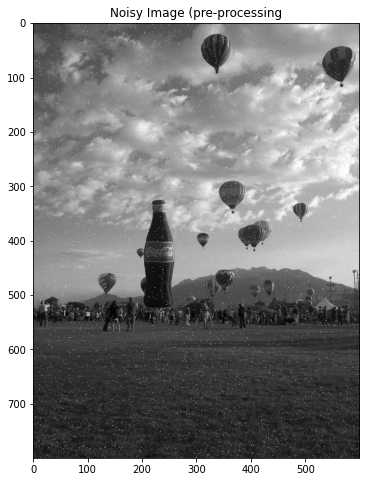

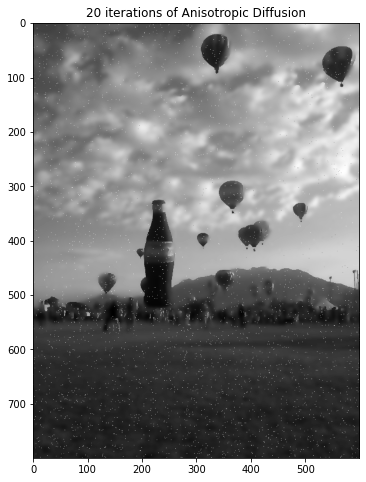

In [21]:
image = imread('balloon.jpg', as_gray=True)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)

image = image * 1./255

fig = plt.figure(figsize=(8,8))
plt.title("Noisy Image (pre-processing)")
plt.imshow(image, cmap=cm.gray)
plt.show()

# set constants
sigma = 0.1
lam = 0.25

g = np.vectorize(lambda x: np.exp(-1*((x/sigma)**2)))

for N in [20]:
    fig = plt.figure(figsize=(8,8))
    plt.title("{} iterations of Anisotropic Diffusion".format(N))
    blur_pic = anisdiff_bw(image, N, lam, g)[-1]
    plt.imshow(blur_pic, cmap=cm.gray)
    plt.show()

The type of blurring that we are doing doesn't work on these tiny grains for the same reason it doesn't blur edges- it is not designed to specifically take out the different parts of an image. The operator doesn't blur very much if it sees an "edge" (meaning a pixel with a very different color) so it also doesn't blur much when it sees out-of-place noise.

# Problem 4 (Optional)

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [ ]:
image = imread('balloons_color.jpg')
x,y,z = image.shape
for dim in range(z):
    for i in range(x*y//100):
        # Assign a random value to a random place
        image[randint(x),randint(y),dim] = 127 + randint(127)
